#Second-hand car data analysis

In [44]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier


dectree = DecisionTreeClassifier(max_depth = 2)
linreg = LinearRegression()

In [2]:
cardata = pd.read_csv('originalData.csv')
cardata.head()

,Unnamed: 0,Year,Make,Model,Kilometres,Body Type,Engine,Transmission,Drivetrain,Exterior Colour,Interior Colour,Passengers,Doors,Fuel Type,City,Highway,Price
0,0,2019,Acura,MDX,53052 km,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Majestic Black Pearl,Red,NaN,NaN,Gas,12.2L/100km,9.0L - 9.5L/100km,43880
1,1,2018,Acura,MDX,77127 km,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Modern Steel Metallic,Black,NaN,NaN,Gas,12.6L/100km,9.0L/100km,36486
2,2,2019,Acura,RDX,33032 km,SUV,2.0L 4cyl,10 Speed Automatic,AWD,White Diamond Pearl,Black,5.0,4,Premium Unleaded,11.0L/100km,8.6L/100km,40888
3,3,2020,Acura,RDX,50702 km,SUV,4 Cylinder Engine,NaN,AWD,Platinum White Pearl,Black,NaN,NaN,Gas,11.0L/100km,8.6L/100km,44599
4,4,2021,Acura,RDX,67950 km,SUV,4 Cylinder Engine,NaN,AWD,Apex Blue Pearl,Red,NaN,NaN,Gas,11.3L/100km,9.1L/100km,46989


In [3]:
print(cardata.dtypes)

Unnamed: 0            int64
Year                  int64
Make                 object
Model                object
Kilometres           object
Body Type            object
 Engine              object
 Transmission        object
 Drivetrain          object
 Exterior Colour     object
 Interior Colour     object
 Passengers         float64
 Doors               object
 Fuel Type           object
 City                object
 Highway             object
Price                 int64
dtype: object


In [4]:
cardata.dropna(inplace=True) #drop rows with missing values

In [5]:
model = pd.DataFrame(cardata)
model

threshold = 50
model_count = cardata['Model'].value_counts()
small_model = model_count[model_count < threshold].index.tolist()

cardata = cardata[~cardata['Model'].isin(small_model)]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(cardata.iloc[:, :-1], 
                                                    cardata.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

#split train test data set

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3087 entries, 2927 to 4890
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3087 non-null   int64  
 1   Year              3087 non-null   int64  
 2   Make              3087 non-null   object 
 3   Model             3087 non-null   object 
 4   Kilometres        3087 non-null   object 
 5   Body Type         3087 non-null   object 
 6    Engine           3087 non-null   object 
 7    Transmission     3087 non-null   object 
 8    Drivetrain       3087 non-null   object 
 9    Exterior Colour  3087 non-null   object 
 10   Interior Colour  3087 non-null   object 
 11   Passengers       3087 non-null   float64
 12   Doors            3087 non-null   object 
 13   Fuel Type        3087 non-null   object 
 14   City             3087 non-null   object 
 15   Highway          3087 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory u

In [8]:
X_train["Make"].value_counts() #different brands of cars

Make
Hyundai          566
Honda            459
Volkswagen       264
Ford             263
BMW              258
Nissan           178
Chevrolet        177
Jeep             169
Audi             145
Porsche          129
Mazda            108
Dodge            102
Acura             69
Kia               45
GMC               44
Mercedes-Benz     38
Alfa Romeo        37
Infiniti          32
MINI               4
Name: count, dtype: int64

In [9]:
make_train = X_train["Make"].str.split(" ", expand = True)
make_test = X_test["Make"].str.split(" ", expand = True)

In [10]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

Text(0, 0.5, 'Count of cars')

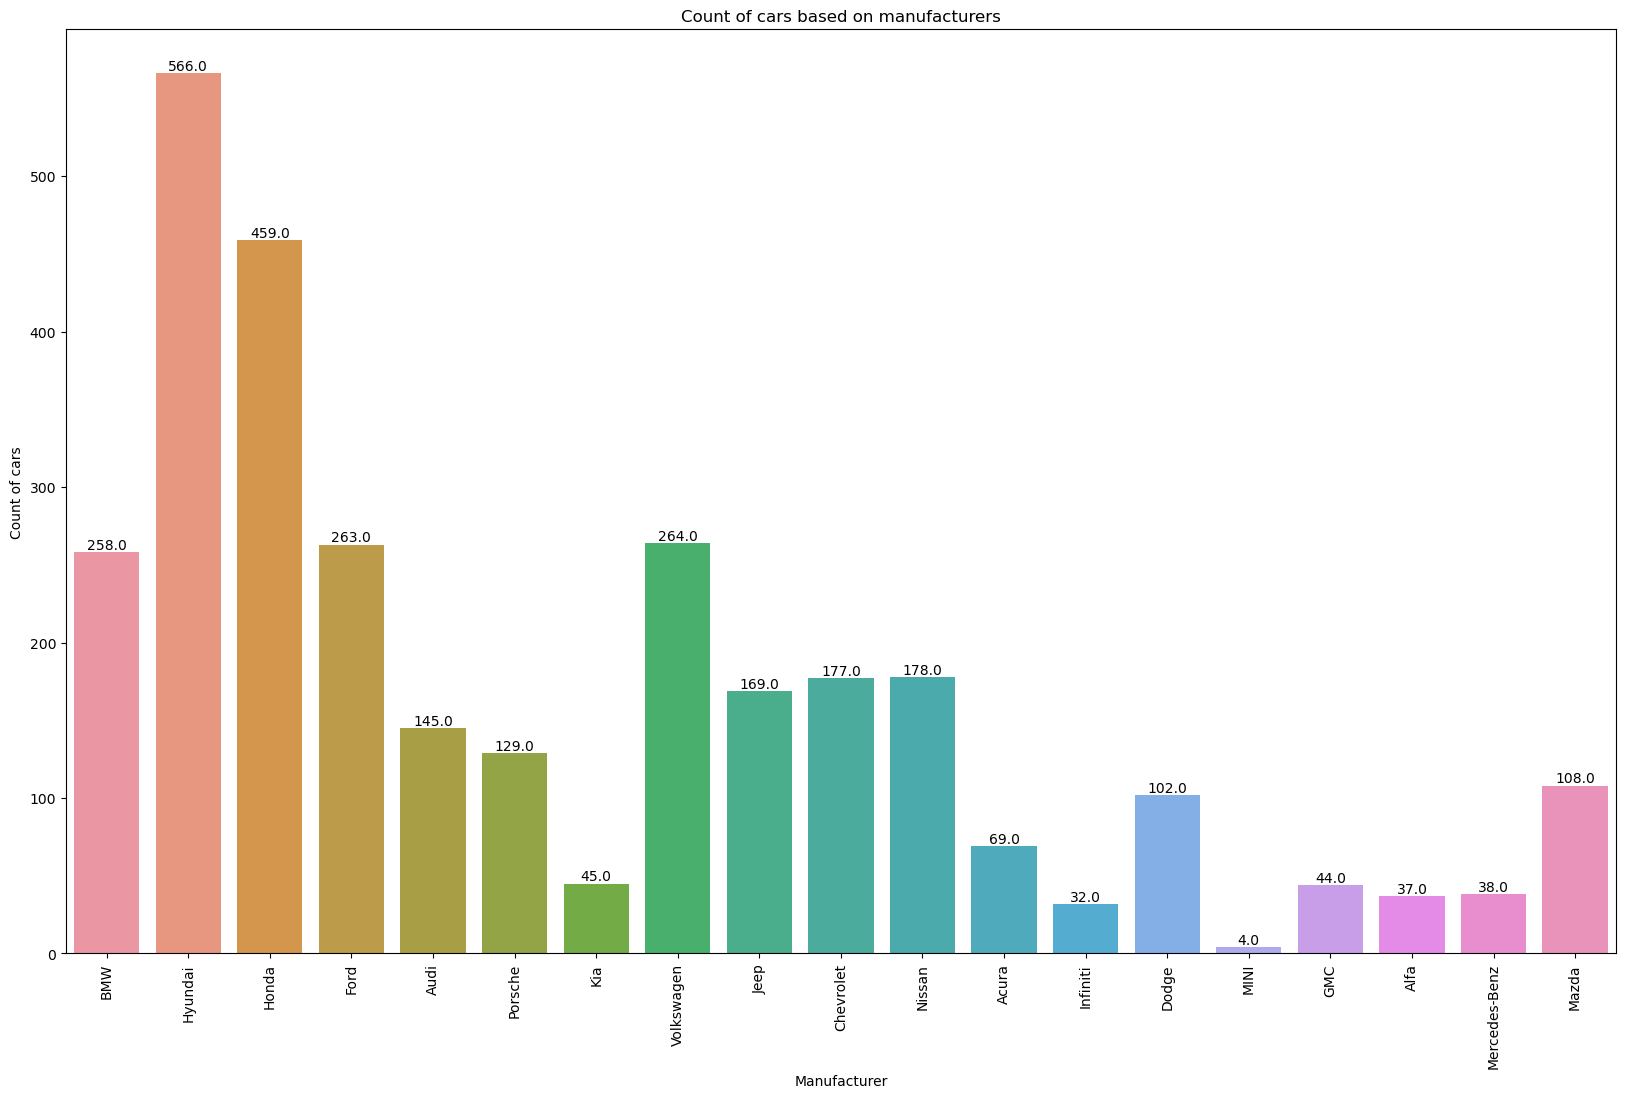

In [11]:
plt.figure(figsize = (20, 12))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

In [12]:
X_train.drop("Make", axis = 1, inplace = True)
X_test.drop("Make", axis = 1, inplace = True)

In [13]:
#model

X_train["Model"].value_counts()

Model
Civic        209
Elantra      186
Santa        146
Grand        127
Tucson       126
CR-V         117
Jetta        104
F-150        103
Rogue         98
Accord        82
Tiguan        74
Silverado     74
X5            71
Wrangler      71
Sonata        68
Cruze         68
X3            62
3             61
Q5            60
Escape        59
Mustang       58
Cayenne       54
Mazda3        54
CX-5          54
Odyssey       52
Macan         47
Sorento       45
Q7            45
Sierra        44
Passat        44
Edge          43
Cherokee      43
Sentra        42
Golf          41
Kona          40
A4            40
C-Class       38
Murano        38
4             37
Romeo         37
RDX           36
Equinox       35
MDX           33
QX60          32
X1            31
Journey       30
911           28
Name: count, dtype: int64

In [14]:
model_train = X_train["Model"].str.split(" ", expand = True)
model_test = X_test["Model"].str.split(" ", expand = True)

In [15]:
X_train["model"] = model_train[0]
X_test["model"] = model_test[0]

Text(0, 0.5, 'Count of cars')

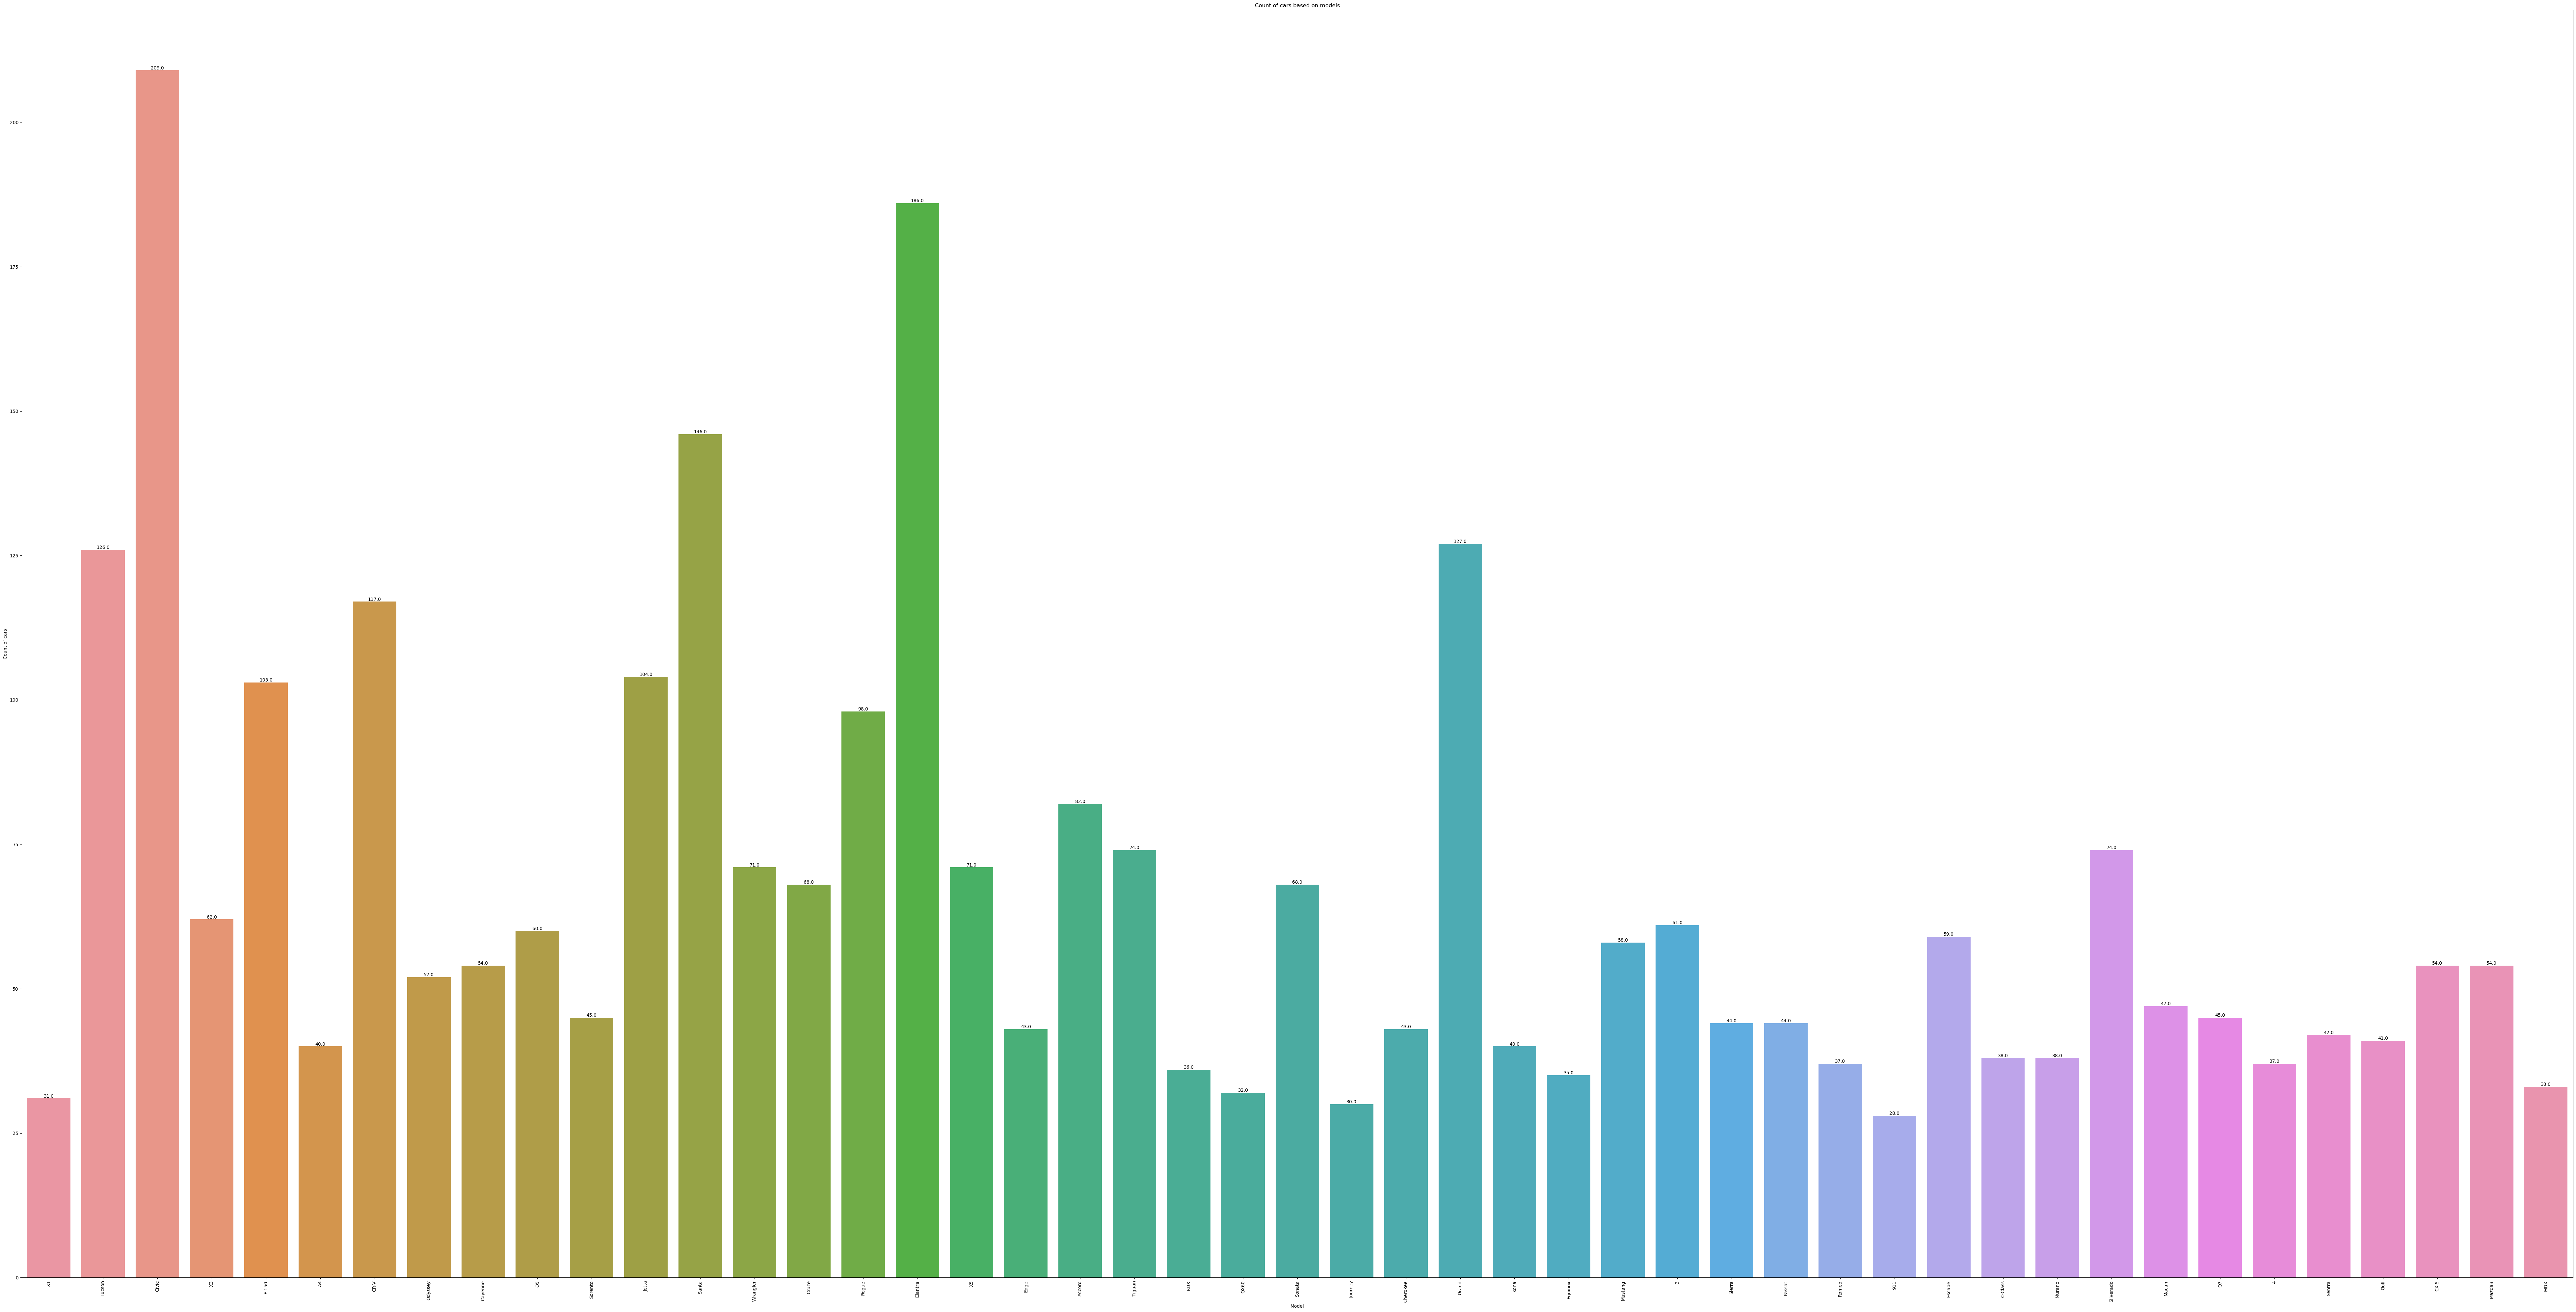

In [16]:
plt.figure(figsize = (100, 50))
plot = sns.countplot(x = 'model', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on models")
plt.xlabel("Model")
plt.ylabel("Count of cars")

In [17]:
X_train.drop("Model", axis = 1, inplace = True)
X_test.drop("Model", axis = 1, inplace = True)

In [18]:
#Transmission

X_train[" Transmission"].value_counts()

 Transmission
Automatic                            1530
CVT                                   395
6 Speed Automatic                     388
8 Speed Automatic                     387
7 Speed Automatic                      86
10 Speed Automatic                     84
Manual                                 54
9 Speed Automatic                      44
6 Speed Manual                         42
5 Speed Automatic                      28
4 Speed Automatic                      12
7 Speed Automatic with auto-shift      12
5 Speed Manual                         11
8 Speed Automatic with auto-shift       9
1 Speed Automatic                       3
Sequential                              2
Name: count, dtype: int64

In [19]:
transmission_train = X_train[" Transmission"].str.split(" ", expand = True)
transmission_test = X_test[" Transmission"].str.split(" ", expand = True)

In [20]:
X_train["transmission"] = transmission_train[0]
X_test["transmission"] = transmission_test[0]

Text(0, 0.5, 'Count of cars')

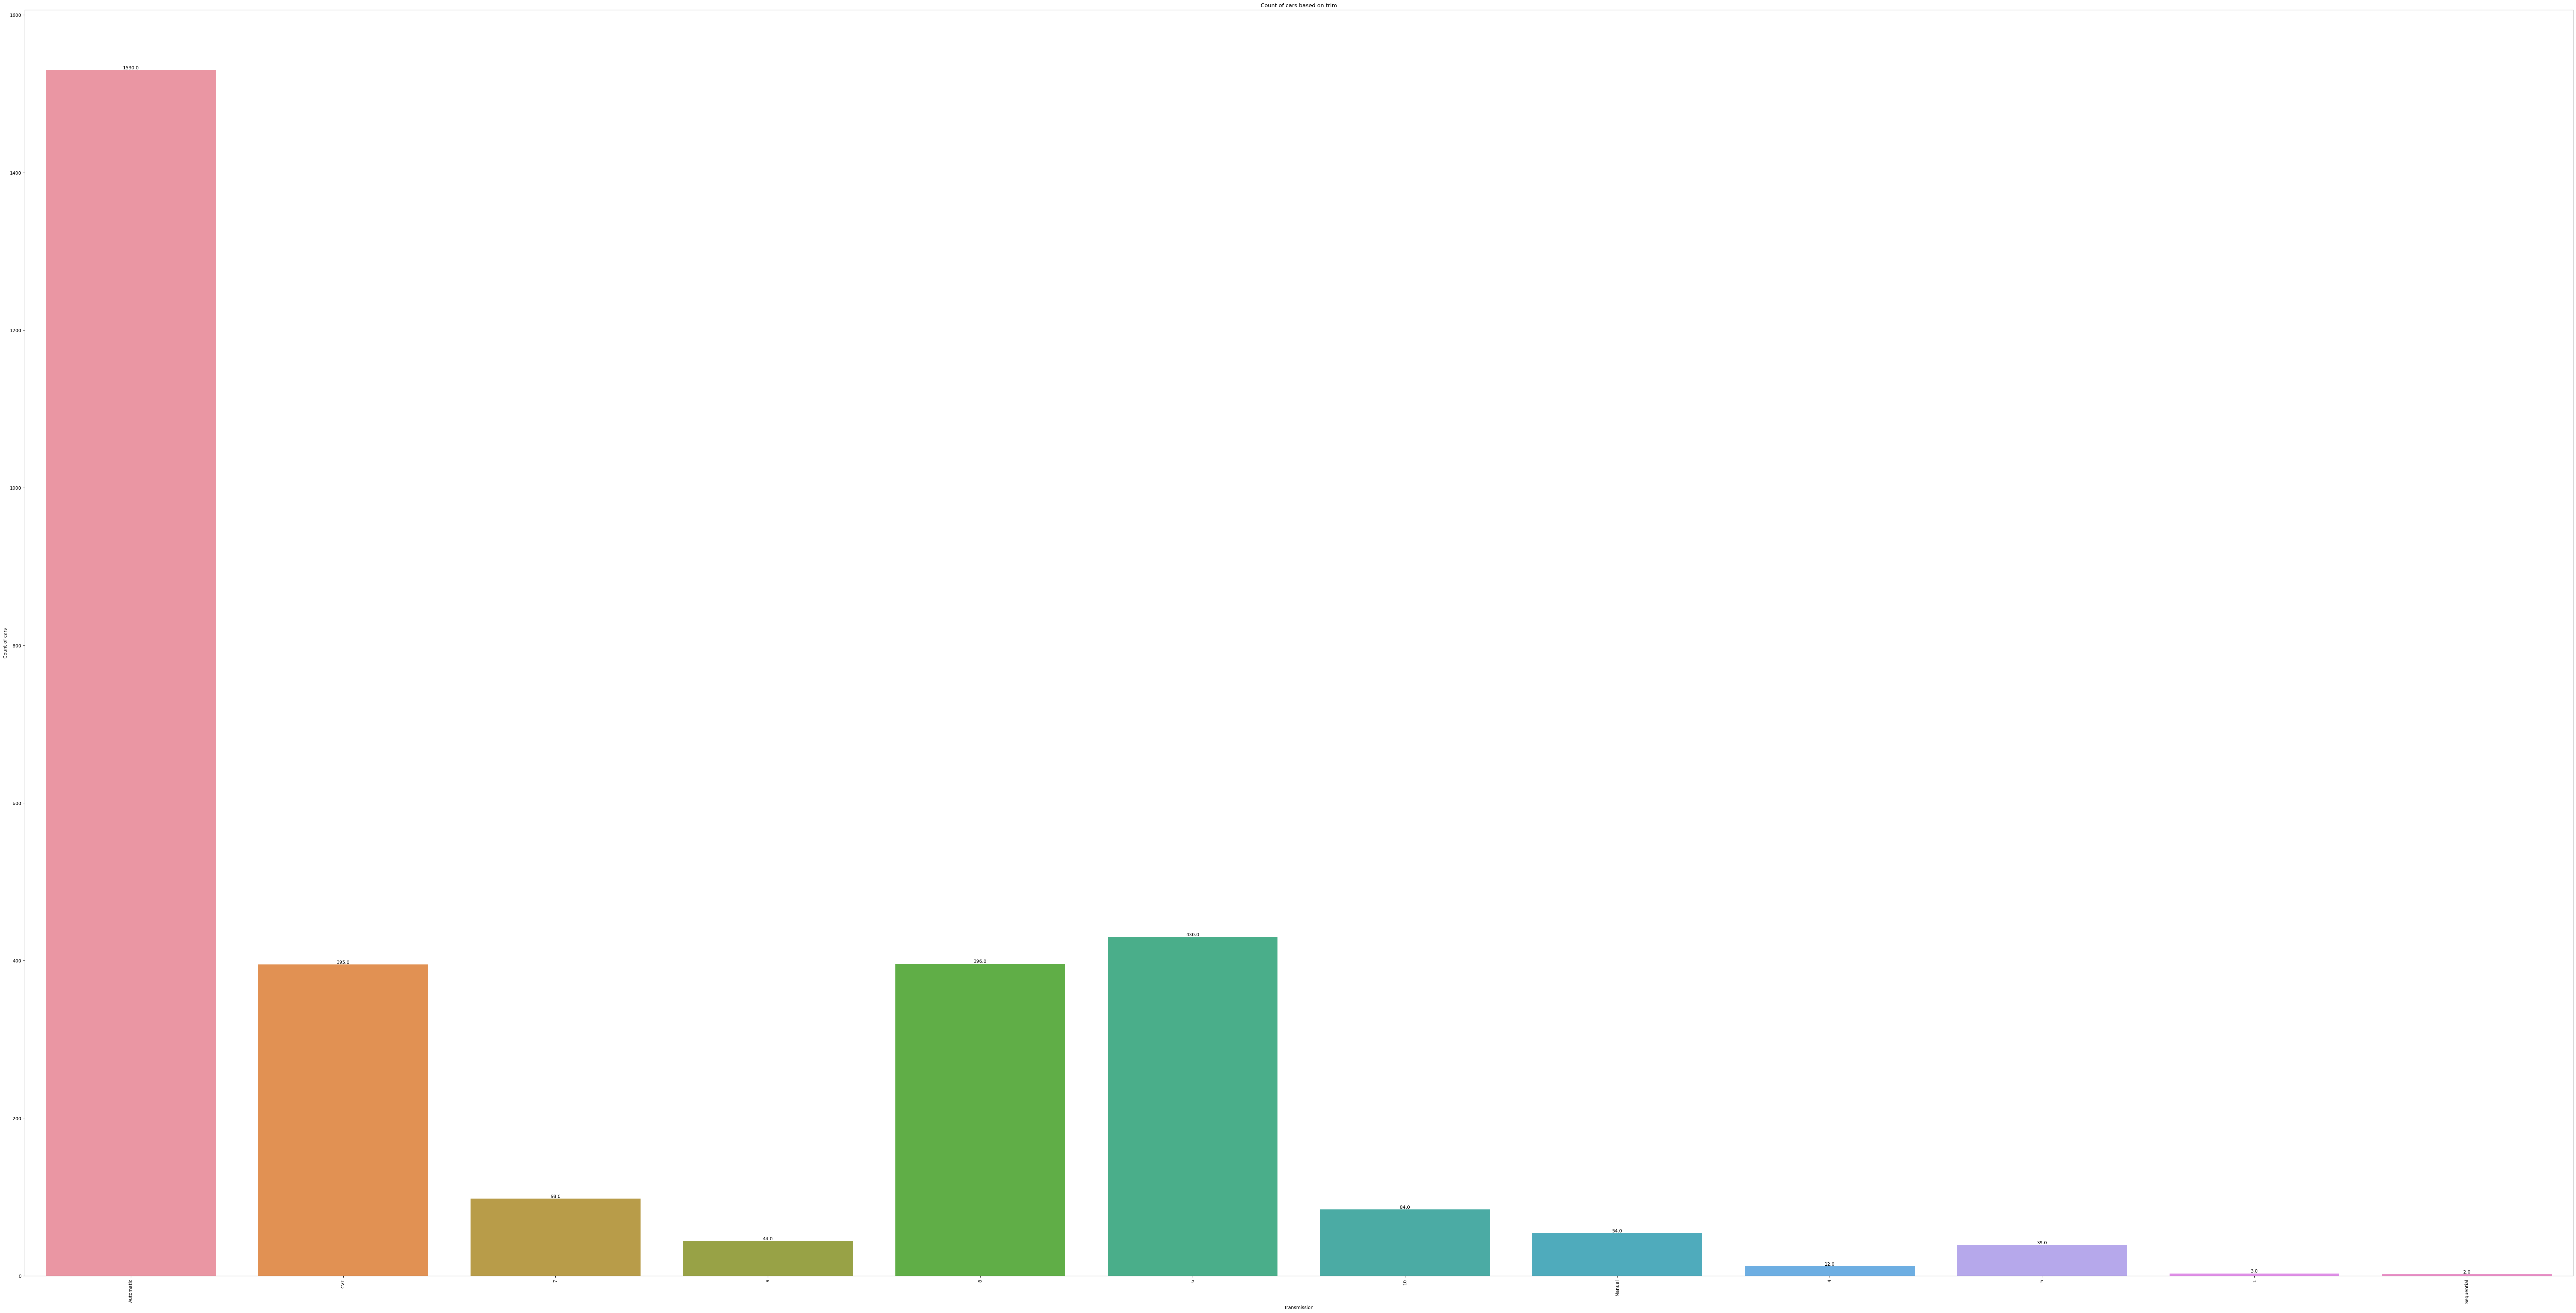

In [21]:
plt.figure(figsize = (100, 50))
plot = sns.countplot(x = 'transmission', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on trim")
plt.xlabel("Transmission")
plt.ylabel("Count of cars")

In [22]:
X_train.drop(" Transmission", axis = 1, inplace = True)
X_test.drop(" Transmission", axis = 1, inplace = True)

In [23]:
#Fuel

X_train[" Fuel Type"].value_counts()

 Fuel Type
Gas                    2743
Premium Unleaded         93
Gasoline Hybrid          72
Diesel                   67
Flexible                 50
Regular Unleaded         37
Other                    13
Electric                 10
Gas/Electric Hybrid       2
Name: count, dtype: int64

In [24]:
fuel_train = X_train[" Fuel Type"].str.split(" ", expand = True)
fuel_test = X_test[" Fuel Type"].str.split(" ", expand = True)

In [25]:
X_train["fuel"] = fuel_train[0]
X_test["fuel"] = fuel_test[0]

Text(0, 0.5, 'Count of cars')

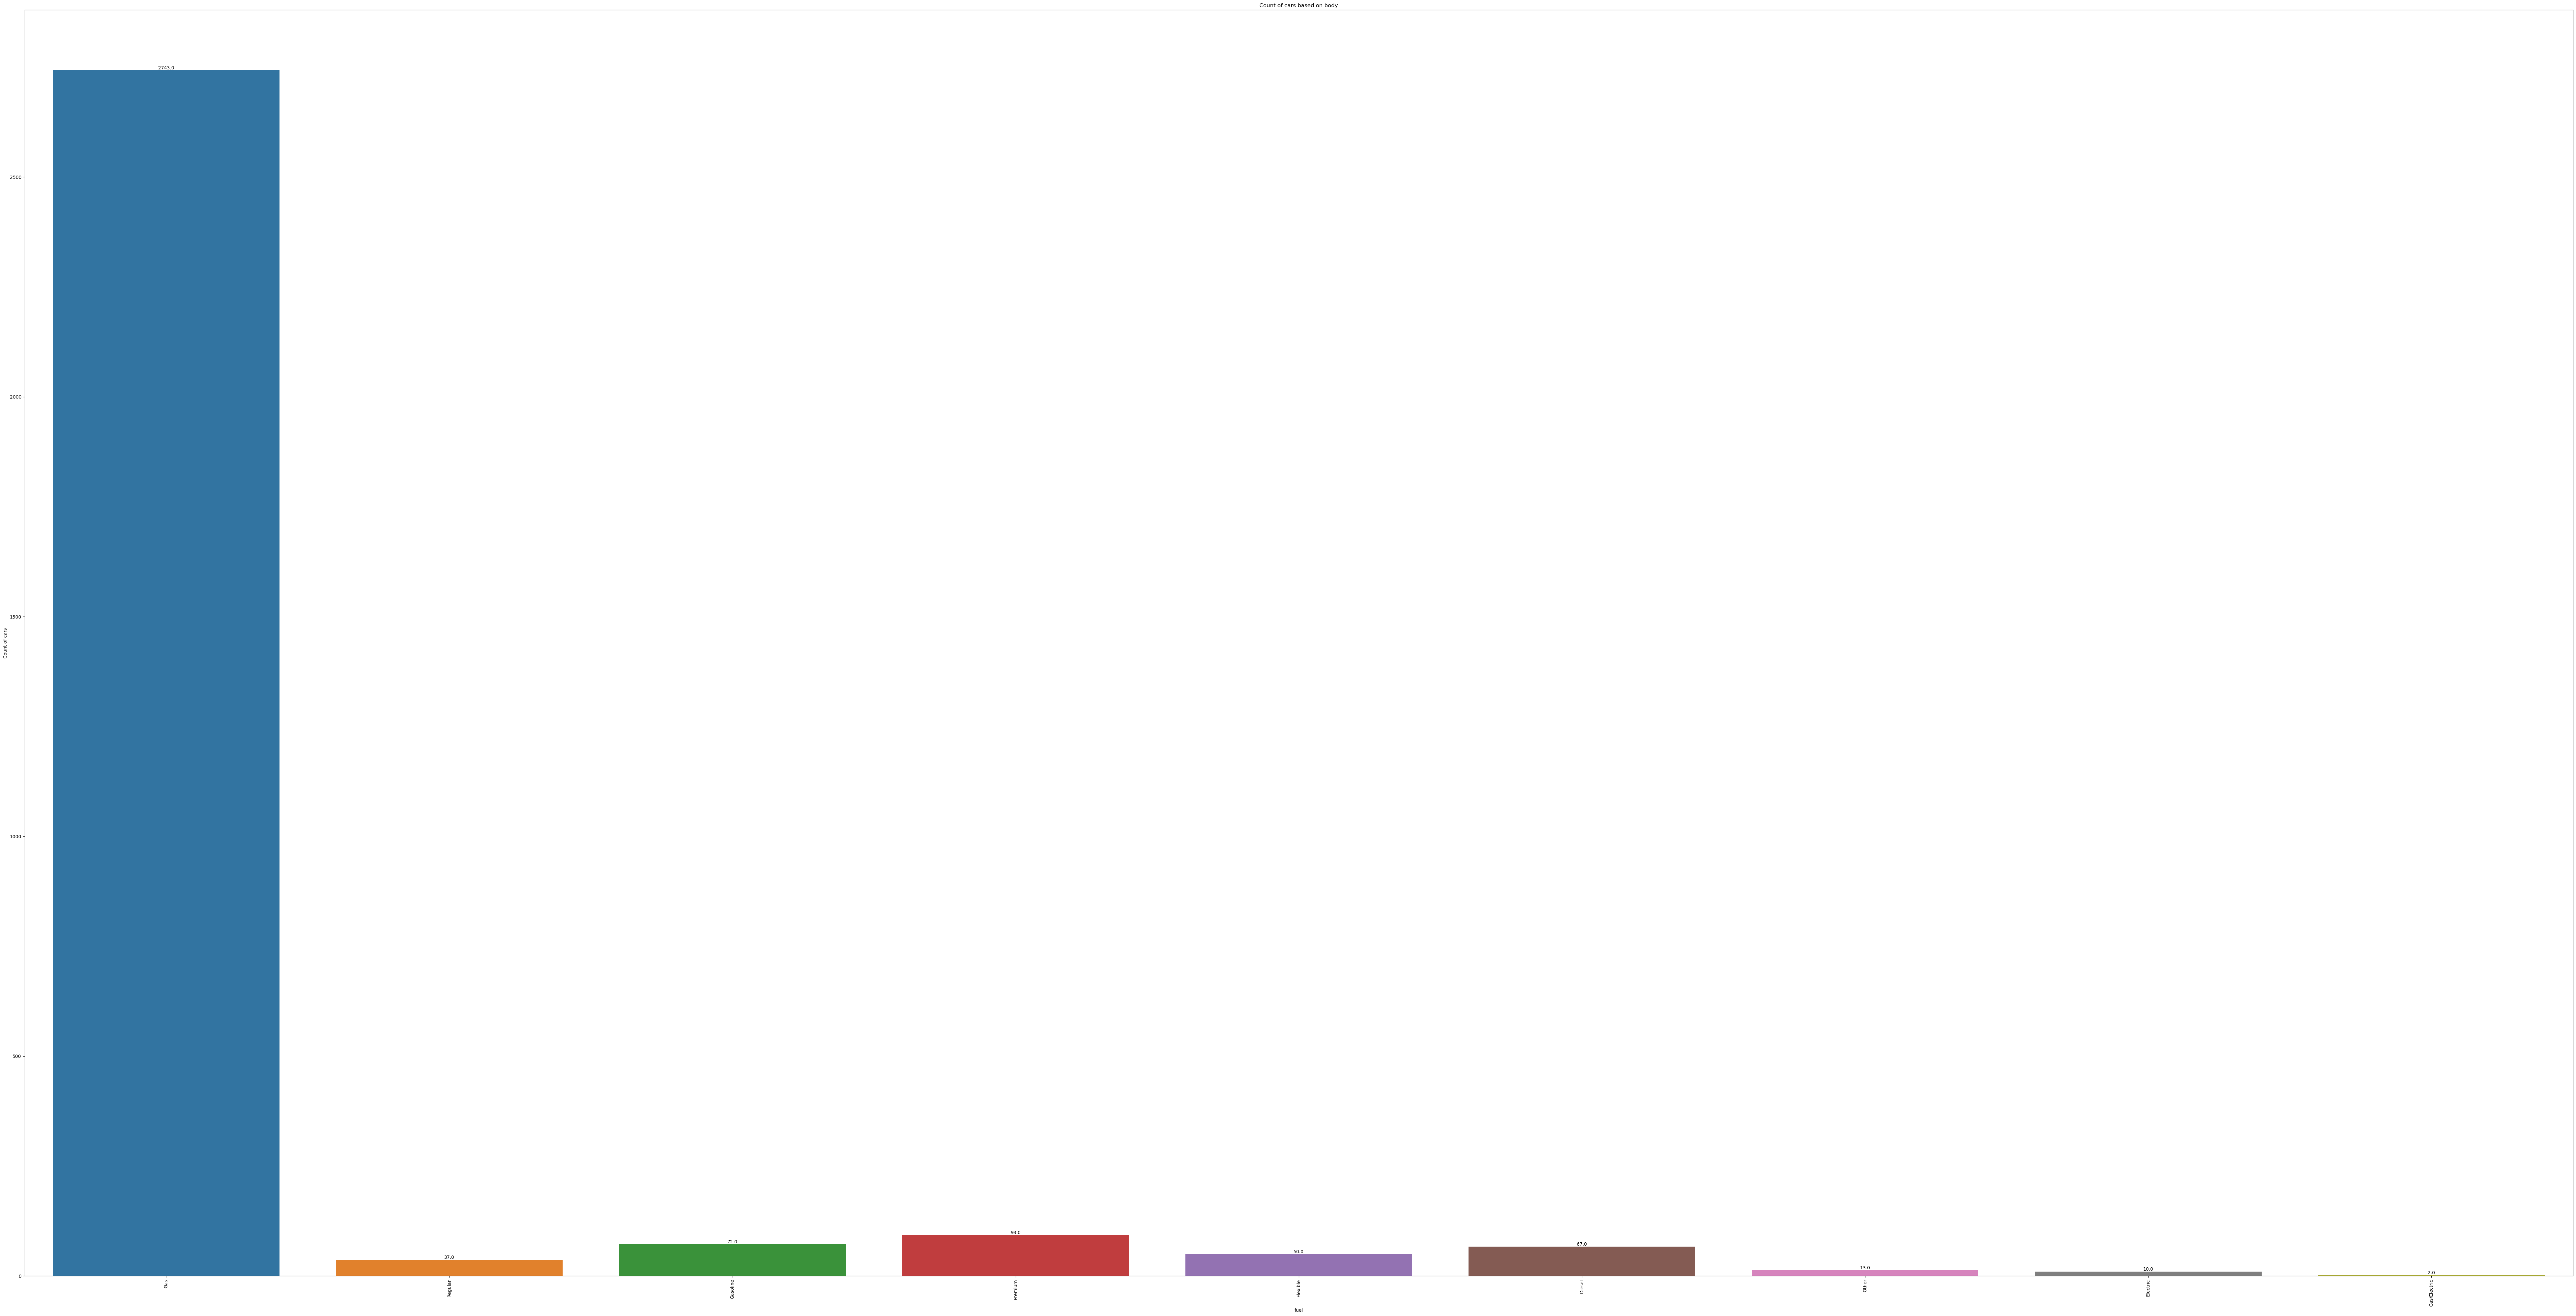

In [26]:
plt.figure(figsize = (100, 50))
plot = sns.countplot(x = 'fuel', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on body")
plt.xlabel("fuel")
plt.ylabel("Count of cars")

In [27]:
X_train.drop(" Fuel Type", axis = 1, inplace = True)
X_test.drop(" Fuel Type", axis = 1, inplace = True)

In [28]:
#parameter w units

km_train = X_train["Kilometres"].str.split(" ", expand = True)
km_test = X_test["Kilometres"].str.split(" ", expand = True)
X_train["Kilometres"] = pd.to_numeric(km_train[0], errors = 'coerce')
X_test["Kilometres"] = pd.to_numeric(km_test[0], errors = 'coerce')

In [29]:
X_train["Kilometres"].fillna(X_train["Kilometres"].astype("float64").mean(), inplace = True)
X_test["Kilometres"].fillna(X_train["Kilometres"].astype("float64").mean(), inplace = True)

In [30]:
X_train.drop(["Year"], axis = 1, inplace = True)
X_test.drop(["Year"], axis = 1, inplace = True)

X_train.drop(["Body Type"], axis = 1, inplace = True)
X_test.drop(["Body Type"], axis = 1, inplace = True)

X_train.drop(["Unnamed: 0"], axis = 1, inplace = True)
X_test.drop(["Unnamed: 0"], axis = 1, inplace = True)

X_train.drop([" Engine"], axis = 1, inplace = True)
X_test.drop([" Engine"], axis = 1, inplace = True)

X_train.drop([" Drivetrain"], axis = 1, inplace = True)
X_test.drop([" Drivetrain"], axis = 1, inplace = True)

X_train.drop([" Exterior Colour"], axis = 1, inplace = True)
X_test.drop([" Exterior Colour"], axis = 1, inplace = True)

X_train.drop([" Interior Colour"], axis = 1, inplace = True)
X_test.drop([" Interior Colour"], axis = 1, inplace = True)

X_train.drop([" Passengers"], axis = 1, inplace = True)
X_test.drop([" Passengers"], axis = 1, inplace = True)

X_train.drop([" Doors"], axis = 1, inplace = True)
X_test.drop([" Doors"], axis = 1, inplace = True)

X_train.drop([" City"], axis = 1, inplace = True)
X_test.drop([" City"], axis = 1, inplace = True)

X_train.drop([" Highway"], axis = 1, inplace = True)
X_test.drop([" Highway"], axis = 1, inplace = True)

In [31]:
print(X_train.columns)

Index(['Kilometres', 'Manufacturer', 'model', 'transmission', 'fuel'], dtype='object')


In [32]:
#Data Processing

X_train = pd.get_dummies(X_train,
                         columns = ["Manufacturer", "model", "transmission", "fuel"],
                         drop_first = True)

In [33]:
X_test = pd.get_dummies(X_test,
                         columns = ["Manufacturer", "model", "transmission", "fuel"],
                         drop_first = True)

In [34]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

In [35]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

In [36]:
linreg.fit(X_train, y_train)

LinearRegression()

Intercept of Regression 	: b =  34540.640534353886
Coefficients of Regression 	: a =  [-1.09166787e+04 -6.86617680e+16 -5.59274240e+16 -7.10872901e+16
 -8.40936077e+16  1.63927704e+15 -5.94272711e+16  3.13511115e+15
 -1.74536509e+16 -1.80655902e+17  3.92716487e+15  2.08624880e+15
  1.42293214e+17 -9.24022168e+15 -5.66307903e+16 -7.87754642e+16
  1.33175263e+17 -1.37596359e+17 -1.37190697e+16 -4.75372649e+02
  4.08381305e+16  8.45070513e+14 -3.34157191e+16  5.04526670e+16
 -3.96819314e+16  6.73101163e+15  5.64716118e+16 -3.11786822e+16
 -5.22083760e+16  1.53894907e+16 -5.15606762e+15  4.99715197e+16
  1.11010618e+16 -6.02373688e+15 -7.90096384e+15 -2.37891281e+16
 -5.28383101e+16 -3.74942735e+16 -2.60981396e+16  2.37497172e+16
 -2.64153956e+16  5.27451849e+16  6.73101163e+15 -9.13186866e+16
 -5.97345623e+15 -2.67425407e+16 -2.46319595e+16  1.03159342e+15
  8.95596912e+14 -2.99435066e+16 -2.75764264e+16 -1.45199507e+17
  4.07095410e+16  4.45775464e+16 -9.59417067e+16 -3.35820017e+16
  1.

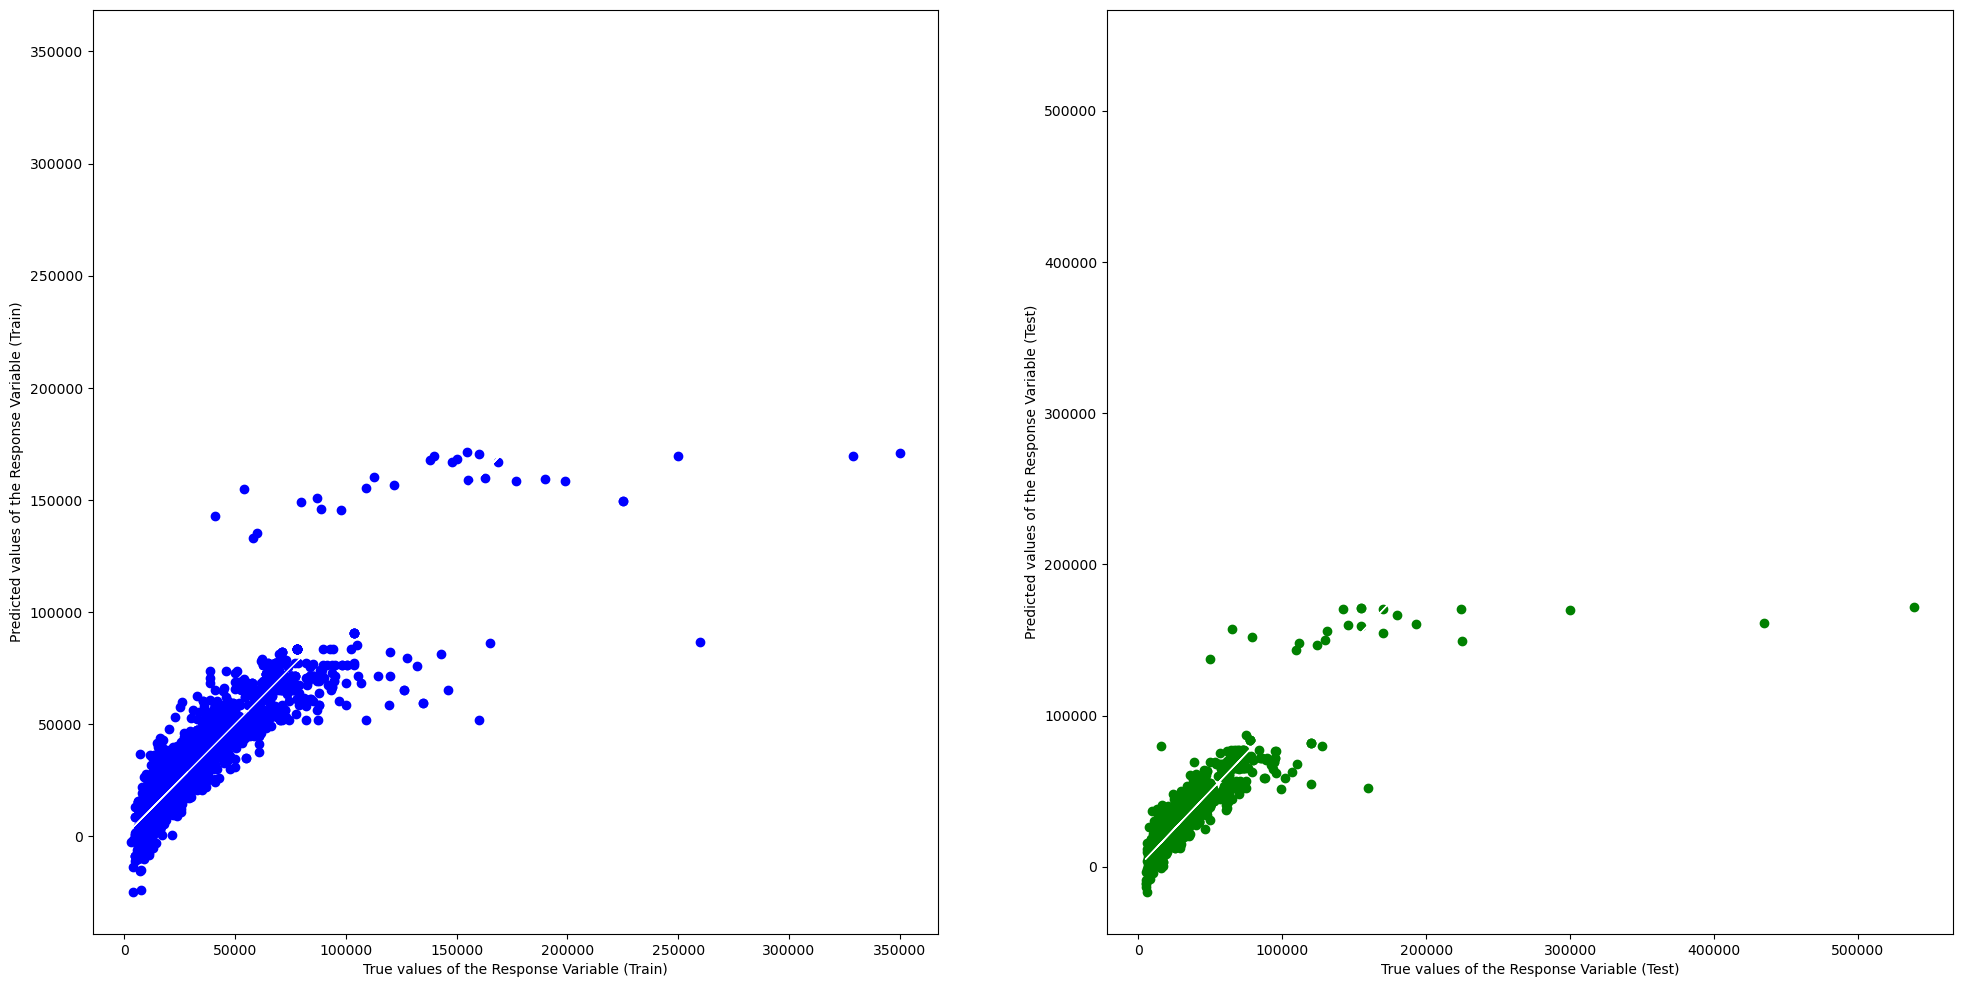

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7615416272320273
Mean Squared Error (MSE) 	: 137146594.30987036

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6923179517868567
Mean Squared Error (MSE) 	: 285841209.8653691



In [39]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [40]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

0.6923179517868567

In [46]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8342278002247967